# Write A Data Science Blog Post

### CRISP-DM: Cross-Industry Standard Process for Data Mining

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Business Understanding.
I love various types of music, from Metallica to Lana Del Rey. Therefore, I choose a dataset related to music to understand more and more about the world's taste in music.

Dataset Name: Top Spotify Tracks of 2018 (https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018/data#)

I came up with 3 questions that I would like to know the answer for.

* Q1: Who are the artists with major tracks.
* Q2: Who are the top 10 artists.
* Q3: what's the Artists distribubtion. Is there a relationship between artists and speechiness
* Q4: what's the relationship between loudness and energy?



### 2. Data Understanding

In [8]:
def reading_files(path):
    """
Description: This function is used to read the files of any giving file
Arguments:
        path: the path for the file

Returns:
    data frame
    """
    return pd.read_csv(path)



In [9]:
## load data
path = "top2018.csv"
df = reading_files(path)
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [3]:
## How many artists
len(df['artists'].value_counts())

70

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [5]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [6]:
df.isnull().sum() ##wohoooo no nulls wow

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

**notes**: We see that there's no null (yay).
there are 70 unique artists. 


### 3. Data Prep

There's not much of data preperation here, since there are no nulls and all the variables i need are there.

### 4. Data Modeling

Q1: Who are the artists with major tracks.
Q2: Who are the top 10 artists.
Q3: what's the Artists distribubtion. Is there a relationship between artists and speechiness
Q4: what's the relationship between loudness and energy?

#### Q1: Who are the artists with major tracks

/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


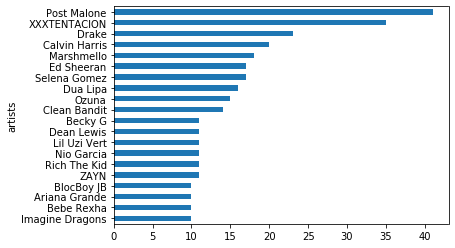

In [51]:
plt.figure()
df.groupby('artists')['key'].sum().nlargest(20).sort_values().plot('barh')

#### Q2: Who are the top 10 artists

In [7]:
artists = df['artists'].value_counts().sort_values(ascending=False)

In [8]:
for index, value in enumerate(artists): 
    if index==10:
        break
    print("Artists #{} is: {} with {} songs. ".format((index+1),artists.index[index], value ))


Artists #1 is: XXXTENTACION with 6 songs. 
Artists #2 is: Post Malone with 6 songs. 
Artists #3 is: Drake with 4 songs. 
Artists #4 is: Ed Sheeran with 3 songs. 
Artists #5 is: Marshmello with 3 songs. 
Artists #6 is: Khalid with 2 songs. 
Artists #7 is: Ozuna with 2 songs. 
Artists #8 is: Dua Lipa with 2 songs. 
Artists #9 is: Selena Gomez with 2 songs. 
Artists #10 is: Clean Bandit with 2 songs. 


#### Q3: what's the Artists distribubtion. Is there a relationship between artists and speechiness

In [9]:
artists.sort_index(ascending=True, inplace=True)

In [10]:
artisits_mean = df.groupby('artists').mean()

In [11]:
artisits_mean

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artists,,,,,,,,,,,,,
5 Seconds of Summer,0.596000,0.8540,7.000000,-5.114000,0.000000,0.463000,0.016900,0.000000,0.124000,0.1520,120.274,203418.000000,4.0
6ix9ine,0.931000,0.3870,1.000000,-9.127000,1.000000,0.412000,0.088000,0.000000,0.136000,0.3760,125.978,179405.000000,4.0
Anitta,0.775000,0.6790,4.000000,-4.985000,0.000000,0.135000,0.180000,0.000073,0.068000,0.6190,166.008,193456.000000,4.0
Anne-Marie,0.697000,0.6830,1.000000,-2.881000,0.000000,0.117000,0.037200,0.000000,0.137000,0.6030,96.133,186987.000000,4.0
Ariana Grande,0.650500,0.6855,5.000000,-5.720500,0.500000,0.057600,0.031650,0.000032,0.265500,0.3110,133.512,201733.500000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
XXXTENTACION,0.788833,0.4920,5.833333,-7.770167,0.333333,0.111767,0.505033,0.001323,0.139233,0.5265,110.496,130783.833333,4.0
ZAYN,0.258000,0.4370,11.000000,-6.593000,0.000000,0.039000,0.101000,0.000001,0.106000,0.0967,180.043,239000.000000,4.0
Zac Efron,0.684000,0.6190,10.000000,-7.005000,1.000000,0.038600,0.071600,0.000000,0.122000,0.2840,125.046,217440.000000,4.0


In [12]:
# Plot age distribution and overall rating together
art_count = artists.values.tolist()
df_mean = artisits_mean['speechiness'].values.tolist()
artists_2 = artists.index.values.tolist()

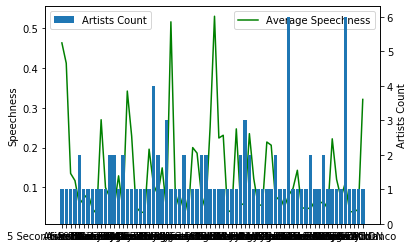

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(artists,df_mean, color = 'green', label='Average Speechness')
ax1.legend(loc=1)
ax1.set_ylabel('Speechness')

ax2 = ax1.twinx()
plt.bar(artists, art_count, label='Artists Count')
ax2.legend(loc=2)
ax2.set_ylabel('Artists Count')
plt.show()

From the plot, I concluded that there's no relationship between speechiness and the popularity of the artists. People just want to dance and not enjoy the poetry...

#### Q4: what's the relationship between loudness and energy?

In [19]:
corr_df = df[['loudness', 'energy', 'liveness','danceability']]

In [20]:
corr_df.corr()

,loudness,energy,liveness,danceability
loudness,1.000000,0.732719,0.000006,0.015517
energy,0.732719,1.000000,0.050542,-0.072582
liveness,0.000006,0.050542,1.000000,-0.038761
danceability,0.015517,-0.072582,-0.038761,1.000000


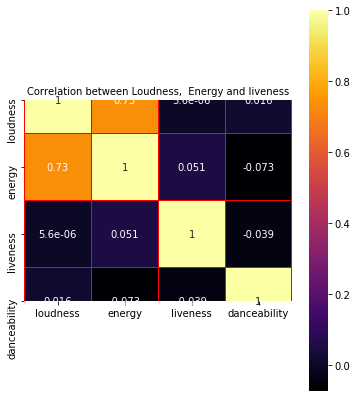

In [45]:
colormap = plt.cm.inferno
plt.figure(figsize=(6,7))
plt.title('Correlation between Loudness,  Energy and liveness', y=1 , size=10)
sns.heatmap(corr_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='red', annot=True)

#### 5. Evaluate the Results

There's a clear correlation between energy and loudness. 

Also from speechness and artist popularity (count) I concluded that there's no relationship between speechiness and the popularity of the artists. People just want to dance and not enjoy the poetry...

XXXTENTACION  and Post Malone are the top most popular artists. also they're the one with top major songs.

#### 6. Deploy
TO GITHUB!